**Nome:** Iran Freitas Ribeiro

**Matrícula:** 20212021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_rel, chi2, t, ttest_ind, f
import matplotlib.pyplot as plt

In [5]:
def CI(mu1, mu2, var1, var2, n1, n2, alpha=0.05):
    """
    Calcula o intervalo de confiança de uma distribuição normal
    """
    zalpha_2  = norm.ppf(alpha/2)
    sqrt_ = (var1/n1) + (var2/n2)
    ci_d = (mu1-mu2) - zalpha_2*np.sqrt(sqrt_) # limite superior    
    ci_l = (mu1-mu2) + zalpha_2*np.sqrt(sqrt_) # limite inferior
    return ci_l, ci_d

def get_XY(f, v=1):
    np.random.seed(42)
    N = np.random.randint(1,11)
    sx=0.1*N
    sy=v*sx
    mx = N+f*0.1*N
    my = N
    Xrand = np.random.normal(loc=mx, scale=np.sqrt(sx), size=1000)
    Yrand = np.random.normal(loc=my, scale=np.sqrt(sy), size=1000)
    return Xrand, mx, sx, Yrand, my, sy

def test_estatistico(m1, m2, delta0, s1, s2, n1, n2):
    num = m1 - m2 - delta0
    denom = np.sqrt((s1/n1) + (s2/n2))
    return num/denom

## 1

Caso I: Se as duas médias forem iguais, deve ser centrada em zero. 
Caso II: Se forem diferentes, vão ser deferentes de 0.

Para os dois casos plotar a distribuição com o intervalo de confiança.

Ver [link](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/5-differences-between-means-type-i-an) com equação para calcular o desvio padrão da média

In [6]:
def pvalue(z0):
    return 1 - norm.cdf(z0)
def testar_f(f=0.1, alpha=0.05):
    r = {}
    palpha = norm.ppf(1-alpha)
    Xf, mx, sx, Yf, my, sy = get_XY(f)
    amostraX = np.random.choice(Xf, size=20)
    amostraY = np.random.choice(Yf, size=20)
    m1, m2 = [np.mean(amostraX), np.mean(amostraY)]
    s1, s2 = [amostraX.var(ddof=1), amostraY.var(ddof=1)]
    z0 = test_estatistico(m1, m2, 0, s1=s1, s2=s2, n1=20, n2=20)
    if (z0 > palpha):
        print ("Rejeitar hipótese nula",end="")
    else:
        print ("Não rejeitar hipótese nula",end="")
    pv = pvalue(z0)
    r['x'], r['y'] = [amostraX,amostraY]
    r['mx'], r['my'] = [mx, my]
    r['sx'], r['sy'] = [sx, sy]
    r['z0'] = z0
    r['pvalue'] = pv
    return r, z0, pv

In [9]:
r, test, pv = testar_f(f=2)
print (" com teste={:.4f} e p-value={:.4f}".format(test, pv))

Rejeitar hipótese nula com teste=3.5865 e p-value=0.0002


In [10]:
nr, n_test, n_pv = testar_f(f=0.3)
print (" com teste={:.4f} e p-value={:.4f}".format(n_test, n_pv))

Não rejeitar hipótese nula com teste=-0.9593 e p-value=0.8313


In [83]:
def std_diff(std1, std2, n1, n2):
    return np.sqrt((std1**2/n1) + (std2**2/n2))

def erro_I(m1, m2, std1, std2, n1=20, n2=20):
    """
    Diferença entre as médias/pelo desvio padrão    
    """
    diff = std_diff(std1, std2, n1, n2)
    z = (m1 - m2)/diff
    e = norm.cdf(z)
    return e

def erro_II(alpha, m1, m2, s1, s2, n1, n2, delta0):
    """
    delta0: hipotese alternativa
    """
    delta = m1-m2   
    z_a2 = norm.ppf(1-(alpha/2))
    denom = np.sqrt((s1/n1) + (s2/n2))
    c1 = (z_a2 - (delta-delta0)/denom)
    c2 = (-z_a2 - (delta-delta0)/denom)
    e = norm.cdf(c1) - norm.cdf(c2)
    return e

In [50]:
0.15/0.11

1.3636363636363635

In [57]:
pvalue(0.15/0.11)

0.08634102070937422

In [165]:
print ("{:.4f}".format(eI_x))

0.0000


In [30]:
def get_pdfs(d, sx, sy, n, b=[0,0]):
    ab_x = [d['mx']-np.sqrt(d['sx']), d['mx']+np.sqrt(d['sx'])]
    ab_y = [d['my']-np.sqrt(d['sy']), d['my']+np.sqrt(d['sy'])]
    Xis = np.linspace(ab_x[0]-b[0], ab_x[1], 500)
    Yis = np.linspace(ab_y[0]-b[1], ab_y[1], 500)
    pdfx = [norm.pdf(xi, loc=d['mx'], scale=sx) for xi in Xis]
    pdfy = [norm.pdf(yi, loc=d['my'], scale=sy) for yi in Yis]
    return Xis, Yis, pdfx, pdfy

In [54]:
0.32/2

0.16

Quando as médias são iguais, ou seja, a diferença entre elas é $0$, o intervalo de confiança deve ser normalmente distribuído com média $0$.

In [12]:
ci_nrx = CI(nr['x'].mean(), 
                nr['y'].mean(),
                nr['x'].var(ddof=1),
                nr['y'].var(ddof=1),
                20,
                20)

In [13]:
Xis = np.linspace(-1,1,100)
stdif = std_diff(nr['x'].std(),nr['y'].std(),20, 20)
pdf_nrj = [norm.pdf(xi, scale=stdif) for xi in Xis]

In [59]:
ei_nr = erro_I(nr['x'].mean(),nr['y'].mean(), nr['x'].std(),nr['y'].std(), 20, 20)
ei_nr

0.16249835811315338

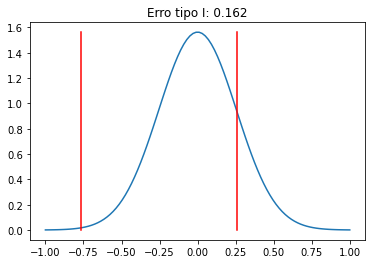

In [60]:
fig, ax = plt.subplots()
ax.plot(Xis, pdf_nrj)
lim_inf, lim_sup = [np.min(pdf_nrj), np.max(pdf_nrj)]
one_x12, one_y12 = [ci_nrx[0],ci_nrx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_nrx[1],ci_nrx[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
plt.title("Erro tipo I: {:.3f}".format(ei_nr));

Para obter o erro tipo II, considerando que a não conseguimos rejeitar a hipótese nula (as distribuições possuem a mesma média), podemos supor a distribuição da diferença entre as médias seja diferente de $0$. Suponha, então, que a distribuição da diferença tenha $\mu=0.26$. A Figura X abaixo mostra a pdf da distribuição com a região crítica.

In [34]:
ci_nrx[1]

0.26194583461282006

In [29]:
Xis2 = np.linspace(-0.75, 1.25, 100)
pdf_nrj2 = [norm.pdf(xi, loc=ci_nrx[1], scale=stdif) for xi in Xis2]

In [82]:
erro_II(0.05, 0, ci_nrx[1], stdif**2, stdif**2, 20, 20, (ci_nrx[1]-0))

2.9066128215404774e-06

In [36]:
ci_eii = norm.interval(0.95, loc=ci_nrx[1], scale=stdif)

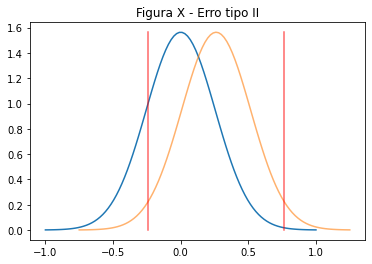

In [48]:
fig, ax = plt.subplots()
lim_inf, lim_sup = [np.min(pdf_nrj), np.max(pdf_nrj)]
ax.plot(Xis, pdf_nrj)
ax.plot(Xis2, pdf_nrj2, alpha=0.6)

one_x12, one_y12 = [ci_eii[0],ci_eii[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_eii[1],ci_eii[1]],[lim_inf,lim_sup]

o_x12, o_y12 = [ci_nrx[0],ci_nrx[0]],[lim_inf,lim_sup]
t_x12, t_y12 = [ci_nrx[1],ci_nrx[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red', alpha=0.6)
# ax.plot(o_x12, o_y12, t_x12, t_y12, color='purple')
plt.title("Figura X - Erro tipo II");

In [49]:
ci_rx = CI(r['x'].mean(), 
                r['y'].mean(),
                r['x'].var(ddof=1),
                r['y'].var(ddof=1),
                20,
                20)
ci_rx

(0.42579776668822733, 1.4519458346128231)

In [66]:
stdif_r = std_diff(r['x'].std(),r['y'].std(),20, 20)
diff_mur = r['x'].mean() - r['y'].mean()
Xis_r = np.linspace(0, 1.75, 100)
Xis_rx = np.linspace(-0.75, 1.5, 100)
pdfx_r = [norm.pdf(xi, loc=diff_mur, scale=stdif_r) for xi in Xis_r]
pdfx2_r = [norm.pdf(xi, loc=ci_rx[0], scale=stdif_r) for xi in Xis_rx]

In [63]:
ei_r = erro_I(r['x'].mean(),r['y'].mean(), r['x'].std(), r['y'].std(), 20, 20)
ei_r

0.9998832462748815

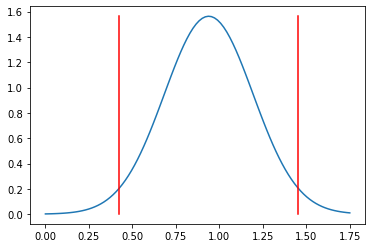

In [69]:
# TODO: Fazer dist da direita usando as duas distribuições que são iguais.
fig, ax = plt.subplots()
ax.plot(Xis_r, pdfx_r,)
lim_inf, lim_sup = [np.min(pdfx_r), np.max(pdfx_r)]
one_x12, one_y12 = [ci_rx[0],ci_rx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_rx[1],ci_rx[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red');

In [73]:
ci_eii = norm.interval(0.95, loc=ci_rx[0], scale=stdif_r)
ci_eii

(-0.07428494258097729, 0.925880475957432)

In [81]:
mudiff = diff_mur - ci_rx[0]
eii = erro_II(0.05, diff_mur, ci_rx[0], stdif_r**2, stdif_r**2, 20, 20, mudiff)
eii

0.95

Text(0.5, 1.0, 'Figura X - Erro tipo II= 0.9500')

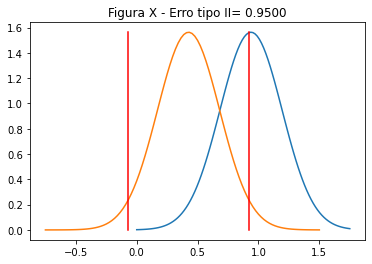

In [80]:
fig, ax = plt.subplots()
ax.plot(Xis_r, pdfx_r,)
ax.plot(Xis_rx, pdfx2_r,)
lim_inf, lim_sup = [np.min(pdfx_r), np.max(pdfx_r)]
one_x12, one_y12 = [ci_eii[0],ci_eii[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_eii[1],ci_eii[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
plt.title("Figura X - Erro tipo II= {:.4f}".format(eii))

## 2

In [84]:
import pandas as pd

In [85]:
subject = np.arange(1,16,1)
before = [265, 240, 258, 295, 251, 245, 287, 314, 260, 279, 283, 240, 238, 225, 247]
after  = [229, 231, 227, 240, 238, 241, 234, 256, 247, 239, 246, 218, 219, 226, 233]
df = pd.DataFrame({'subject': subject, 'before': before, 'after':after})
df

,subject,before,after
0,1,265,229
1,2,240,231
2,3,258,227
3,4,295,240
4,5,251,238
5,6,245,241
6,7,287,234
7,8,314,256
8,9,260,247
9,10,279,239


Para solução da questão temos duas hipóteses:

$H_0$: Dieta com baixo teor de gordura e exercícios aeróbicos não reduzem o nível de colesterol no sangue (com um nível de significância $\alpha=0.05$)

$H_1$: Dieta com baixo teor de gordura e exercícios aeróbicos reduzem o nível de colesterol no sangue

O teste pareado pode ser feito com a função `ttest_rel` do Python.

In [86]:
res = ttest_rel(df['before'], df['after'])

In [88]:
res.statistic, res.pvalue.round(4)

(5.4658739941050065, 0.0001)

O teste estatístico indica que após a dieta e o exercício há uma diferença de $\approx 5.4$ no nível de colesterol no sangue.
Como o $p$-value ($0.0001$) é menor que $\alpha$, não conseguimos rejeitar a hipótese nula de que as médias são iguais, logo, podemos afirmar que dietas com baixa calorias e exercícios reduzem o nível de colesterol no sangue. 

## 3

In [56]:
def F_var(n1, n2, a=0.05):
    fe = f.ppf(a/2,(n1-1),(n2-1))
    fd = f.ppf(1-a/2,(n1-1),(n2-1))
    return fe,fd
    
def pvalue_var(ftest, ftest_inv, n1, n2):
    pe = f.cdf(ftest, n1, n2)
    pd = 1 - f.cdf(ftest_inv, n1, n2)
    return pe + pd   


1. O parâmetro de interesse é a variância $\sigma^2$
2. $H_0$: $\sigma_{x}^2 = \sigma_{y}^2$
3. $H_1$: $\sigma_{x}^2 \neq \sigma_{y}^2$
4. $\alpha=0.05$
5. O teste estatístico é definido pela função `x_0 = teste_estatistico_var()`
6. Rejeitamos $H_0$ se `x_0` $> \chi_{0.05,19}^2 = 30.14$ 
7. Calculos:

In [57]:
def dict_variaveis(v):
    var_rej = {}
    Xv, mx_v, sx_v, Yv, my_v, sy_v = get_XY(f=1.26, v=v)
    amostraXv = np.random.choice(Xv, size=20)
    amostraYv = np.random.choice(Yv, size=20)
    ci = F_var(20, 20)
    var_rej['Xv'], var_rej['Yv'] = [Xv, Yv]
    var_rej['x'], var_rej['y'] = [amostraXv, amostraYv]
    var_rej['sx'],var_rej['sy'] = [sx_v, sy_v]
    var_rej['mx'],var_rej['my'] = [mx_v, my_v]
    return var_rej, ci

In [60]:
def CI_Var(r, fe, fd):
    """
    Calcula o intervalo de confiança da variância
    """
    ci = [0,0]
    ci[0] = r*fe
    ci[1] = r*fd
    return ci

def erro_I_var(d, sn='x', n=20):
    s2 = d['s{}'.format(sn)]
    ci_ = CI_Var(n,s2)
    z1x = chi2.cdf(0)
    e = norm.cdf(z1x)
    return e, ci_

In [58]:
rejeitar, f_var_rj = dict_variaveis(0.2)
ratio1 = rejeitar['x'].var(ddof=1)/rejeitar['y'].var(ddof=1)
ratio2 = rejeitar['y'].var(ddof=1)/rejeitar['x'].var(ddof=1)
print (f_var_rj, ratio1, ratio2,0.05)
pvalor = pvalue_var(ratio1, ratio2, 20, 20)
if f_var_rj[0]<ratio1 and ratio1<f_var_rj[1]:
    print ("Não rejeita ", ratio1, pvalor)
else:
    print ("Rejeita ", ratio1, pvalor)

(0.39581215954322335, 2.5264509335792606) 6.793078161565807 0.14720866979830238 0.05
Rejeita  6.793078161565807 1.9999263696177467


In [59]:
nrejeitar, f_var = dict_variaveis(1.4)
nratio1 = nrejeitar['x'].var(ddof=1)/nrejeitar['y'].var(ddof=1)
nratio2 = nrejeitar['y'].var(ddof=1)/nrejeitar['x'].var(ddof=1)
print (f_var, nratio1, nratio2)
pvalor = pvalue_var(nratio1, nratio2, 20, 20)
if f_var[0]<nratio1 and nratio1<f_var[1]:
    print ("Não rejeita ", ratio1, pvalor)
else:
    print ("Rejeita ", nratio1, pvalor)

(0.39581215954322335, 2.5264509335792606) 0.9704397373665443 1.0304606885881162
Não rejeita  6.793078161565807 0.947170000999392


In [68]:
xrj = np.linspace(0, 17.5, 100)
ci_varrj = CI_Var(ratio1, f_var_rj[0], f_var_rj[1])

In [87]:
ratio1

6.793078161565807

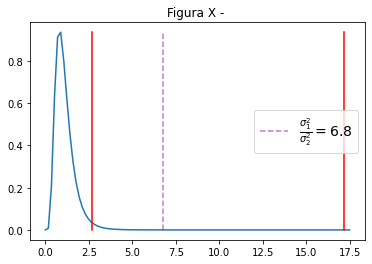

In [88]:
fig, ax = plt.subplots()
pdff = f.pdf(xrj, 19, 19)
ax.plot(xrj, pdff)
lim_inf, lim_sup = [np.min(pdff), np.max(pdff)]
one_x12, one_y12 = [ci_varrj[0],ci_varrj[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_varrj[1],ci_varrj[1]],[lim_inf,lim_sup]
rtx, rty =  [ratio1,ratio1],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(rtx, rty, color='purple', alpha=0.5, ls='--', label=r'$\frac{\sigma_1^2}{\sigma_2^2}=6.8$',)
plt.legend(prop={'size': 14})
plt.title("Figura X - ");

In [73]:
ci_var = CI_Var(nratio1, f_var[0], f_var[1])

In [76]:
x = np.linspace(0, 4, 100)

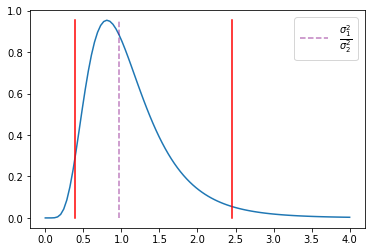

In [84]:
fig, ax = plt.subplots()
pdff = f.pdf(x, 19, 19)
ax.plot(x, pdff,)
lim_inf, lim_sup = [np.min(pdff), np.max(pdff)]
one_x12, one_y12 = [ci_var[0],ci_var[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_var[1],ci_var[1]],[lim_inf,lim_sup]
rtx, rty =  [nratio1,nratio1],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(rtx, rty, color='purple', alpha=0.5, ls='--', label=r'$\frac{\sigma_1^2}{\sigma_2^2}$',)
plt.legend(prop={'size': 14})


$\frac{\sigma_1^2}{\sigma_2^2}$

## 4

[Ver](https://stats.stackexchange.com/questions/475289/confidence-interval-for-2-sample-t-test-with-scipy)

In [2]:
np.random.seed(42) # para fins de reprodutibilidade
N = np.random.randint(1, 11)
sigma = np.sqrt(0.05*N)
X_4 = np.random.normal(loc=N, scale=sigma, size=1000)
# x(k+500)=x(k+500)+0.3*N*k/500
for k in range(0, 500, 1):
    X_4[k+500] = X_4[k+500] + 0.3*N*(k/500)

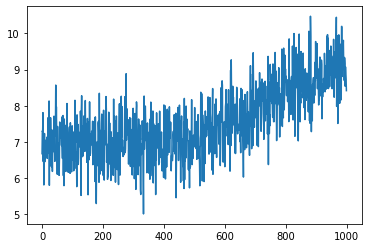

In [3]:
fig, ax = plt.subplots()
ax.plot(np.arange(1000), X_4);

In [12]:
def welch_ttest(x1, x2, a):
    
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - t.ppf(1-a,df)*pooled_se 
    ub = delta + t.ppf(1-a,df)*pooled_se
    ci = [lb, ub]
    return ci, p

In [144]:
def e_I(m1, m2, v1, v2, n1=20, n2=20, alpha=0.05):
    ci_ = CI(m1, m2, var1=v1, var2=v2, n1=n1, n2=n2, alpha=alpha)
    denom = (v1/n1) + (v2/n2)
    z1x = (ci_[0]-(m1-m2))/denom
    e = norm.cdf(z1x)*2
    return e, ci_

$H_0$: não foi detectado erro, com nível de confiança de $0.05$

$H_1$: foi detectado erro

Erro tipo I é equivalente ao $\alpha
$

In [52]:
def testes(Ns, NC):
    erros = {'n':[], 'nc':[], 'tipo_i':[], 'tipo_ii':[]}
    for nc in NC:
        for n in Ns:
            a = 1 - nc
            palpha = 1 - a
            inicio_dados = X_4[:n]
            restante_dados = X_4[n:]
            m1, m2 = [inicio_dados.mean(), restante_dados.mean()]
            s1, s2 = [inicio_dados.var(ddof=1), restante_dados.var(ddof=1)]
            z0 = test_estatistico(m1, m2, 0, s1=s1, s2=s2, n1=len(inicio_dados), n2=len(restante_dados))    
            eii = erro_II(a, m1, m2, s1, s2, len(inicio_dados), len(restante_dados), 0)
            ei = erro_I(m1, m2, np.sqrt(s1), np.sqrt(s2), len(inicio_dados),len(restante_dados) )
            erros['tipo_i'].append(ei)
            erros['tipo_ii'].append(eii)
            erros['n'].append(n)
            erros['nc'].append(nc)
    return erros

In [53]:
Ns = np.linspace(20,100,3, dtype='int')
erros = testes(Ns, [0.90, 0.95, 0.97])

In [54]:
pd.DataFrame(erros)

,n,nc,tipo_i,tipo_ii
0,20,0.90,4.863074e-12,7.022332e-08
1,60,0.90,6.426428e-14,2.396089e-09
2,100,0.90,1.392053e-21,1.443290e-15
3,20,0.95,4.863074e-12,3.719210e-07
4,60,0.95,6.426428e-14,1.519958e-08
5,100,0.95,1.392053e-21,1.687539e-14
6,20,0.97,4.863074e-12,1.071620e-06
7,60,0.97,6.426428e-14,4.937865e-08
8,100,0.97,1.392053e-21,8.371082e-14
